In [ ]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd
import librosa
import librosa.display
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

metadata=pd.read_csv('/content/drive/MyDrive/stageactia/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


Audio Classification Data Preprocessing

In [ ]:
import librosa
audio_file_path='/content/drive/MyDrive/stageactia/UrbanSound8K/audio/fold10/100648-1-0-0.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [ ]:
print(librosa_audio_data)

[0.         0.         0.         ... 0.01810447 0.02733562 0.03400249]


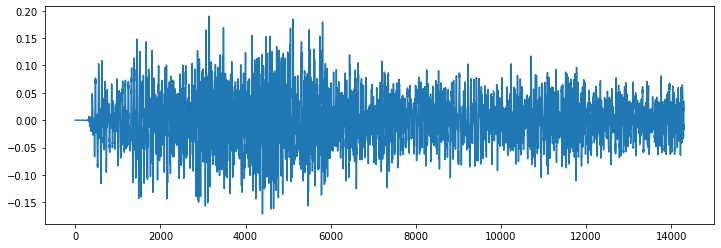

In [ ]:
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

Observation

In [ ]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [ ]:
wave_audio

array([[   0,    0],
       [   0,    0],
       [   0,    0],
       ...,
       [1043, 1043],
       [1026, 1026],
       [1073, 1073]], dtype=int16)

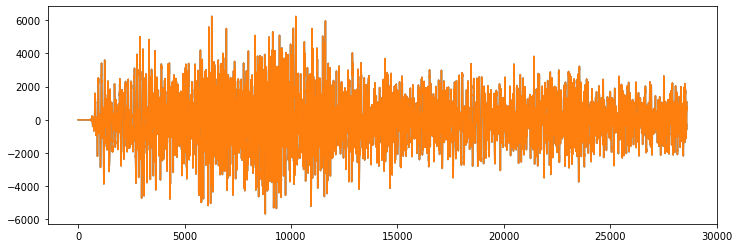

In [ ]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

Extract Features


In [ ]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 28)


In [ ]:
mfccs

array([[-3.1895581e+02, -2.3942128e+02, -2.0357265e+02, ...,
        -2.0086092e+02, -2.0448689e+02, -2.0722505e+02],
       [ 1.3420425e+02,  1.2830580e+02,  1.2176123e+02, ...,
         1.0863275e+02,  1.0139013e+02,  1.0701703e+02],
       [ 2.0304191e-01,  4.4783659e+00, -3.0841732e+00, ...,
        -1.1387668e+01, -5.7280025e+00, -3.3810382e+00],
       ...,
       [-6.1883860e+00, -3.8724489e+00,  2.4436965e+00, ...,
         3.2355461e+00, -1.7571191e+00, -1.1406713e+00],
       [ 7.8616667e+00,  5.9473574e-01, -5.7830071e+00, ...,
        -4.5311007e+00, -2.4484234e+00, -1.0505850e+00],
       [-8.8828011e+00, -2.0356376e+00, -2.3477187e+00, ...,
        -7.5166661e-01,  3.9468117e+00,  3.7475438e+00]], dtype=float32)

In [ ]:
import pandas as pd
import os
import librosa

audio_dataset_path='/content/drive/MyDrive/stageactia/UrbanSound8K/audio'
metadata=pd.read_csv('/content/drive/MyDrive/stageactia/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [ ]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [ ]:
import numpy as np
from tqdm import tqdm
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [20:47,  2.98it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
8326it [46:22,  4.28it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
8329it [46:23,  4.52it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
8732it [48:25,  3.00it/s]


In [ ]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-214.95764, 70.502464, -130.70279, -53.116936...",dog_bark
1,"[-423.7311, 109.2299, -52.872597, 60.827538, 0...",children_playing
2,"[-458.52844, 121.35432, -46.535675, 51.969467,...",children_playing
3,"[-413.63254, 101.61351, -35.43868, 53.047146, ...",children_playing
4,"[-446.38693, 113.68634, -52.4572, 60.349724, 2...",children_playing


In [ ]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [ ]:

X.shape

(8732, 40)

In [ ]:
y


array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train

array([[-1.3082390e+02,  1.1256225e+02, -2.2600878e+01, ...,
         3.2528090e+00, -1.3692100e+00,  2.7386472e+00],
       [-1.3446434e+01,  9.1048195e+01, -7.8661475e+00, ...,
        -3.2665925e+00, -5.2884049e+00, -1.5532947e+00],
       [-4.9575279e+01,  2.3543632e-01, -2.0504959e+01, ...,
         2.8775635e+00, -1.5828822e+00,  3.5109408e+00],
       ...,
       [-4.2677444e+02,  9.2583252e+01,  3.3174915e+00, ...,
         7.9330587e-01,  7.1890557e-01,  7.1397954e-01],
       [-1.4541722e+02,  1.3619025e+02, -3.3450352e+01, ...,
         1.4591718e+00, -1.9928970e+00, -8.9318532e-01],
       [-4.2099823e+02,  2.1074756e+02,  3.5814035e+00, ...,
        -5.4054909e+00, -3.3959775e+00, -1.5590975e+00]], dtype=float32)

In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
X_train.shape

(6985, 40)

In [ ]:
X_test.shape

(1747, 40)

In [ ]:
y_train.shape

(6985, 10)

In [ ]:
y_test.shape

(1747, 10)

Model Creation


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
num_labels=y.shape[1]

In [ ]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
209/219 [===========================>..] - ETA: 0s - loss: 10.6071 - accuracy: 0.1257
Epoch 1: val_loss improved from inf to 2.28563, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 2s 5ms/step - loss: 10.2827 - accuracy: 0.1258 - val_loss: 2.2856 - val_accuracy: 0.1208
Epoch 2/100
213/219 [============================>.] - ETA: 0s - loss: 2.5578 - accuracy: 0.1291
Epoch 2: val_loss improved from 2.28563 to 2.27622, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 2.5542 - accuracy: 0.1290 - val_loss: 2.2762 - val_accuracy: 0.1088
Epoch 3/100
212/219 [============================>.] - ETA: 0s - loss: 2.3359 - accuracy: 0.1263
Epoch 3: val_loss improved from 2.27622 to 2.20795, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 2.3360 - accuracy: 0.1248 - val_loss: 2.2079 - val_accuracy: 0.12

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7607327103614807


Testing Some Test Audio **Data**



In [ ]:
import librosa 
filename='/content/drive/MyDrive/cleaned_data/eval_balanced/Emergency/105.wav'
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

predict_label=model.predict(mfccs_scaled_features) 
classes_label=np.argmax(predict_label,axis=1)

print(classes_label)

prediction_class = labelencoder.inverse_transform(classes_label) 
prediction_class


[-136.29364     152.65561     -62.20506      70.2245      -16.890215
   15.495337     25.815641     -7.3658853    31.459112    -11.078077
    6.693735      8.438194     -9.756095     10.744754    -12.312787
    2.1573284    -0.59030354   -8.950372      7.1393185    -7.0702076
    3.3401825    -1.303158     -5.3245173     3.409095     -7.4750667
    2.2311       -3.190249     -5.3471713     1.7474864    -5.0974936
    1.7773226    -2.8066642    -3.0516493    -0.87348133   -5.841939
    0.9086297    -3.29701      -2.7749302    -1.6764535    -4.4903727 ]
[[-136.29364     152.65561     -62.20506      70.2245      -16.890215
    15.495337     25.815641     -7.3658853    31.459112    -11.078077
     6.693735      8.438194     -9.756095     10.744754    -12.312787
     2.1573284    -0.59030354   -8.950372      7.1393185    -7.0702076
     3.3401825    -1.303158     -5.3245173     3.409095     -7.4750667
     2.2311       -3.190249     -5.3471713     1.7474864    -5.0974936
     1.7773226    -

array(['drilling'], dtype='<U16')

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.optimizers import adam_v2
opt_alpha1 = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt_alpha1, metrics=['accuracy'])


model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)

history_alpha1 = model.fit(X_train, y_train, validation_data=(X_train, y_train), epochs=200, verbose=0)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


207/219 [===========================>..] - ETA: 0s - loss: 0.9600 - accuracy: 0.6869
Epoch 1: val_loss improved from 0.78810 to 0.78413, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 2s 5ms/step - loss: 0.9596 - accuracy: 0.6865 - val_loss: 0.7841 - val_accuracy: 0.7670
Epoch 2/100
202/219 [==========================>...] - ETA: 0s - loss: 0.9617 - accuracy: 0.6895
Epoch 2: val_loss did not improve from 0.78413
219/219 [==============================] - 1s 4ms/step - loss: 0.9657 - accuracy: 0.6873 - val_loss: 0.8032 - val_accuracy: 0.7493
Epoch 3/100
213/219 [============================>.] - ETA: 0s - loss: 0.9762 - accuracy: 0.6831
Epoch 3: val_loss did not improve from 0.78413
219/219 [==============================] - 1s 3ms/step - loss: 0.9758 - accuracy: 0.6827 - val_loss: 0.8050 - val_accuracy: 0.7602
Epoch 4/100
204/219 [==========================>...] - ETA: 0s - loss: 0.9506 - accuracy: 0.6828
Epoch 4: val_loss did not impr

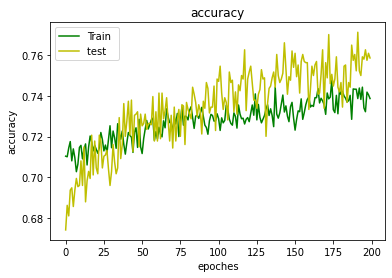

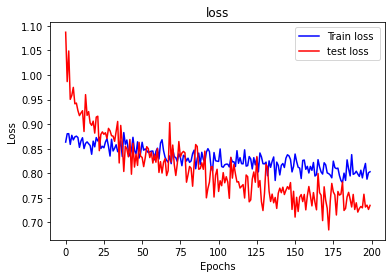

In [ ]:
history_alpha2 = model.fit(X_test, y_test, validation_data=(X_test, y_test), epochs=200, verbose=0)
plt.plot(history_alpha1.epoch, history_alpha1.history["accuracy"], 'g', label='Train ')
plt.plot(history_alpha2.epoch, history_alpha2.history["accuracy"], 'y', label='test ')
plt.title('accuracy')
plt.xlabel('epoches')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.plot(history_alpha1.epoch, history_alpha1.history["loss"], 'b', label='Train loss ')
plt.plot(history_alpha2.epoch, history_alpha2.history["loss"], 'r', label='test loss')
plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()